In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
raw_data = pd.read_csv('./2020 PPP Dataset/PPP Train ALL.csv')

In [3]:
raw_data.head()

,Unnamed: 0,BusinessType,CD,City,DateApproved,Gender,JobsRetained,Lender,LoanRange,NAICSCode,NonProfit,RaceEthnicity,State,Veteran,Zip,Industry,Index
0,0,Independent Contractors,CA - 49,LA JOLLA,04/30/2020,Unanswered,1.0,"U.S. Bank, National Association",$16300-27300,531210.0,N,Unanswered,CA,Unanswered,92037.0,Offices of Real Estate Agents and Brokers,1026947
1,1,Limited Liability Company(LLC),CA - 39,BREA,04/30/2020,Male Owned,4.0,"Bank of America, National Association",$7964-16300,423490.0,N,Unanswered,CA,Non-Veteran,92821.0,Other Professional Equipment and Supplies Merc...,1143280
2,2,Limited Liability Company(LLC),MI - 08,ROCHESTER HILLS,04/06/2020,Unanswered,208.0,Oxford Bank,$2-5 million,541612.0,N,Unanswered,MI,Unanswered,48309.0,Human Resources Consulting Services,286838
3,3,Independent Contractors,PA - 01,PHILADELPHIA,06/24/2020,Male Owned,1.0,Sun FCU,$0-7964,541430.0,N,White,PA,Unanswered,19123.0,Graphic Design Services,3727822
4,4,Sole Proprietorship,TX - 30,DALLAS,04/15/2020,Unanswered,10.0,"Texas Capital Bank, National Association",$56313-150000,522291.0,N,Unanswered,TX,Unanswered,75223.0,Consumer Lending,3960482


In [4]:
raw_data = raw_data.drop('Unnamed: 0', axis=1)
raw_data.describe(include='all')

,BusinessType,CD,City,DateApproved,Gender,JobsRetained,Lender,LoanRange,NAICSCode,NonProfit,RaceEthnicity,State,Veteran,Zip,Industry,Index
count,3963196,3966377,3966339,3966377,3966377,3.966377e+06,3966377,3966377,3.966377e+06,3966377,3966377,3966377,3966377,3.966343e+06,3966377,3.966377e+06
unique,17,525,33772,79,3,NaN,4858,10,NaN,2,9,51,3,NaN,1057,NaN
top,Corporation,TX - 02,NEW YORK,04/28/2020,Unanswered,NaN,"Bank of America, National Association",$56313-150000,NaN,N,Unanswered,CA,Unanswered,NaN,Full-Service Restaurants,NaN
freq,1149395,27714,47649,373702,3038019,NaN,269464,691621,NaN,3813123,3507995,454229,3337009,NaN,146877,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.139693e+01,NaN,NaN,5.295676e+05,NaN,NaN,NaN,NaN,5.149352e+04,NaN,2.266325e+06
std,NaN,NaN,NaN,NaN,NaN,3.262006e+01,NaN,NaN,1.790093e+05,NaN,NaN,NaN,NaN,2.954638e+04,NaN,1.319637e+06
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1.111100e+05,NaN,NaN,NaN,NaN,9.200000e+01,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,4.451100e+05,NaN,NaN,NaN,NaN,2.857200e+04,NaN,1.125314e+06
50%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,5.412130e+05,NaN,NaN,NaN,NaN,4.940800e+04,NaN,2.260370e+06
75%,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,6.216100e+05,NaN,NaN,NaN,NaN,7.813200e+04,NaN,3.399381e+06


In [5]:
raw_data.shape

(3966377, 16)

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobsRetained', ylabel='Density'>

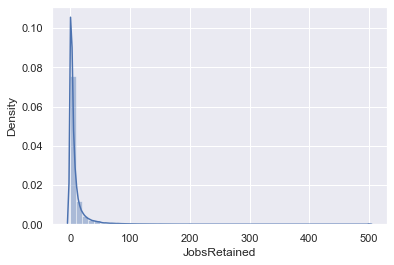

In [6]:
sns.distplot(raw_data['JobsRetained'])

In [7]:
data_excluding_outliers = raw_data[raw_data['JobsRetained'] < raw_data['JobsRetained'].quantile(0.95)]

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobsRetained', ylabel='Density'>

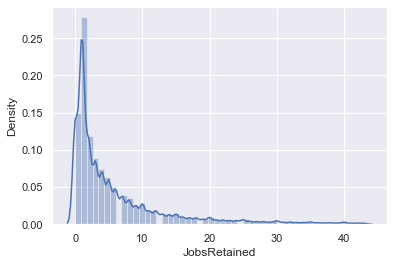

In [8]:
sns.distplot(data_excluding_outliers['JobsRetained'])

In [46]:
data_excluding_outliers['JobsRetained'].apply(lambda x: np.log(x+0.0000001))

0          0.000000
1          1.386294
3          0.000000
4          2.302585
5          2.079442
             ...   
3966372    3.044522
3966373    1.098612
3966374    2.302585
3966375    2.079442
3966376    0.000000
Name: JobsRetained, Length: 3767925, dtype: float64

C:\Users\animathur\AppData\Local\Continuum\anaconda3\envs\py3-TensorFlow2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobsRetained', ylabel='Density'>

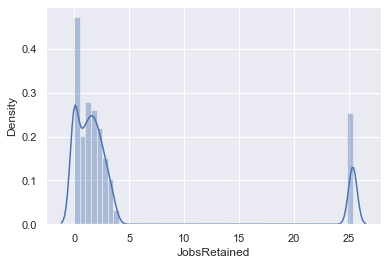

In [52]:
sns.distplot(data_excluding_outliers['JobsRetained'].apply(lambda x: abs(np.log(x+0.00000000001))))

In [9]:
data_excluding_outliers['BusinessType'].unique()

array(['Independent Contractors', 'Limited  Liability Company(LLC)',
       'Sole Proprietorship', 'Corporation', 'Subchapter S Corporation',
       'Self-Employed Individuals', 'Non-Profit Organization',
       'Partnership', 'Professional Association',
       'Limited Liability Partnership', 'Cooperative', nan, 'Trust',
       'Non-Profit Childcare Center', 'Tenant in Common',
       'Employee Stock Ownership Plan(ESOP)', 'Joint Venture',
       'Rollover as Business Start-Ups (ROB'], dtype=object)

In [10]:
data_null_imputed = data_excluding_outliers.copy()
data_null_imputed['BusinessType'] = data_excluding_outliers['BusinessType'].fillna('Other_BT')

In [11]:
data_null_imputed['City'] = data_excluding_outliers['City'].fillna('Other City')

In [12]:
data_with_eliminated_columns = data_null_imputed.drop(columns=['Zip', 'City', 'State', 'Gender', 'NAICSCode', 'DateApproved', 'Lender', 'Industry', 'Index'], axis=1)

In [13]:
data_with_eliminated_columns.describe(include='all')

,BusinessType,CD,JobsRetained,LoanRange,NonProfit,RaceEthnicity,Veteran
count,3767925,3767925,3.767925e+06,3767925,3767925,3767925,3767925
unique,18,521,NaN,10,2,9,3
top,Limited Liability Company(LLC),TX - 02,NaN,$0-7964,N,Unanswered,Unanswered
freq,1094312,25845,NaN,680304,3634019,3339780,3180750
mean,NaN,NaN,6.044744e+00,NaN,NaN,NaN,NaN
std,NaN,NaN,7.997668e+00,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN


In [14]:
data_cleaned = data_with_eliminated_columns.copy()
# drop incomplete values of CD
filter_valid_CD = lambda cd: cd.split('-')[1].strip() != ''
data_cleaned = data_cleaned[data_cleaned['CD'].apply(filter_valid_CD)]
len(data_cleaned)

3766492

In [ ]:
# check for inconsistency of CD with State
# unique_states = data_cleaned['State'].unique()
# check_CD_State = lambda cd: len(np.where(unique_states == cd.split('-')[0].strip())[0]) == 0
# print(data_cleaned[data_cleaned['CD'].apply(check_CD_State)])
# print(unique_states)

Looks like record on 376784 is incorrect because CD and state dont match.

In [ ]:
# # Removing row at index 376784 due to inconsistency in CD and state
# data_cleaned = data_cleaned.drop(index=376784)
# len(data_cleaned)

In [ ]:
# data_cleaned = data_with_eliminated_columns.copy()
# data_cleaned['NAICSCode'] = data_cleaned['NAICSCode'].astype(str)

In [15]:
# Rearrange columns
data_cleaned = data_cleaned[['BusinessType', 'CD', 'LoanRange', 'NonProfit',
       'RaceEthnicity', 'Veteran', 'JobsRetained']]

In [16]:
data_cleaned.describe(include='all')

,BusinessType,CD,LoanRange,NonProfit,RaceEthnicity,Veteran,JobsRetained
count,3766492,3766492,3766492,3766492,3766492,3766492,3.766492e+06
unique,18,494,10,2,9,3,NaN
top,Limited Liability Company(LLC),TX - 02,$0-7964,N,Unanswered,Unanswered,NaN
freq,1093815,25845,680060,3632608,3338457,3179533,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.044692e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,7.997688e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+00


In [17]:
data_cleaned['LoanRange'].unique()

array(['$16300-27300', '$7964-16300', '$0-7964', '$56313-150000',
       '$27300-56313', '$150,000-350,000', '$350,000-1 million',
       '$1-2 million', '$2-5 million', '$5-10 million'], dtype=object)

In [18]:
for col in data_cleaned.columns:
    unique_col_vals = data_cleaned[col].unique()
    print(unique_col_vals, len(unique_col_vals))

['Independent Contractors' 'Limited  Liability Company(LLC)'
 'Sole Proprietorship' 'Corporation' 'Subchapter S Corporation'
 'Self-Employed Individuals' 'Non-Profit Organization' 'Partnership'
 'Professional Association' 'Limited Liability Partnership' 'Cooperative'
 'Other_BT' 'Trust' 'Non-Profit Childcare Center' 'Tenant in Common'
 'Employee Stock Ownership Plan(ESOP)' 'Joint Venture'
 'Rollover as Business Start-Ups (ROB'] 18
['CA - 49' 'CA - 39' 'PA - 01' 'TX - 30' 'TX - 10' 'NH - 01' 'NC - 06'
 'CA - 52' 'OK - 01' 'CA - 26' 'OR - 04' 'IL - 04' 'MN - 01' 'VA - 02'
 'WI - 01' 'GA - 05' 'NC - 05' 'TX - 20' 'TN - 03' 'CT - 05' 'GA - 06'
 'TX - 34' 'NY - 22' 'MI - 05' 'MO - 08' 'KS - 01' 'CA - 18' 'TX - 11'
 'MI - 08' 'NE - 03' 'IA - 02' 'LA - 01' 'IN - 03' 'NY - 18' 'CA - 25'
 'MN - 07' 'ND - 00' 'TN - 01' 'NJ - 03' 'PA - 17' 'NY - 01' 'FL - 23'
 'SD - 00' 'MN - 08' 'SC - 01' 'NY - 21' 'ME - 02' 'ID - 01' 'IA - 04'
 'TX - 01' 'CT - 04' 'TN - 07' 'TN - 05' 'IN - 05' 'FL - 16' 'MO - 0

In [19]:
data_cleaned.dtypes

BusinessType      object
CD                object
LoanRange         object
NonProfit         object
RaceEthnicity     object
Veteran           object
JobsRetained     float64
dtype: object

In [20]:
# Transform columns using One-hot encoding
col_transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), list(range(6)))], remainder='passthrough')

data_transformed = col_transformer.fit_transform(data_cleaned)

In [21]:
data_transformed.shape

(3766492, 531)

In [26]:
X = data_transformed[:, 0: -1].toarray()
y = data_transformed[:, -1].toarray()

In [27]:
business_type_dummies = X[:, :17]

cd_dummies = X[:, 17:510]

In [28]:
business_type_dummies.shape, cd_dummies.shape

((3766492, 17), (3766492, 493))

In [29]:
# PCA for business type
pca_bt = PCA(n_components=5)
pca_bt.fit(business_type_dummies)

PCA(n_components=5)

In [30]:
np.cumsum(pca_bt.explained_variance_ratio_)

array([0.36632278, 0.62045415, 0.80919478, 0.87855895, 0.92478679])

In [31]:
# PCA for CD
pca_cd = PCA(n_components=15)
pca_cd.fit(cd_dummies)

PCA(n_components=15)

In [32]:
np.cumsum(pca_cd.explained_variance_ratio_)

array([0.00687698, 0.01364437, 0.02006946, 0.02628477, 0.03233666,
       0.03830905, 0.04400235, 0.04934024, 0.05449937, 0.05944089,
       0.0642025 , 0.06886916, 0.07337865, 0.07784077, 0.08221901])

In [33]:
# cd_explained_variance_sum = np.cumsum(pca_cd.explained_variance_ratio_)
# for i in range(cd_explained_variance_sum.shape[0]):
#     if(round(cd_explained_variance_sum[i]) > .90):
#         print(i, cd_explained_variance_sum[i])
#         break

In [34]:
# pca_NAICSCode = IncrementalPCA(n_components=5, batch_size=1000)
# pca_NAICSCode.fit(NAICSCode_dummies)

In [35]:
bt_pca_transformed = pca_bt.transform(business_type_dummies)
cd_pca_transformed = pca_cd.transform(cd_dummies)

In [36]:
X_reduced = X[:, 510:]
X_reduced.shape

(3766492, 20)

In [37]:
X_reduced = np.hstack((cd_pca_transformed, X_reduced))
X_reduced = np.hstack((bt_pca_transformed, X_reduced))

In [50]:
X_train, X_validation, y_train, y_validation = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

C:\Users\animathur\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [42]:
X_train.shape, X_validation.shape

((3013193, 40), (753299, 40))

In [43]:
# loadings = pca.components_
# num_pc = pca.n_features_
# pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
# loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
# loadings_df['variable'] = X_train.columns.values
# loadings_df = loadings_df.set_index('variable')
# loadings_df

In [44]:
np.savez('preprocessed_train_data', inputs=X_train, targets=y_train)
np.savez('preprocessed_validation_data', inputs=X_validation, targets=y_validation)